In [1]:
import joblib
import pickle
import numpy as np
import laytr

In [2]:
som = pickle.load(open("../soms/adotto_TRv1.1_3mers.som", 'rb'))

First, let's make a plot of the som.

Text(0.5, 1.0, 'First example plot')

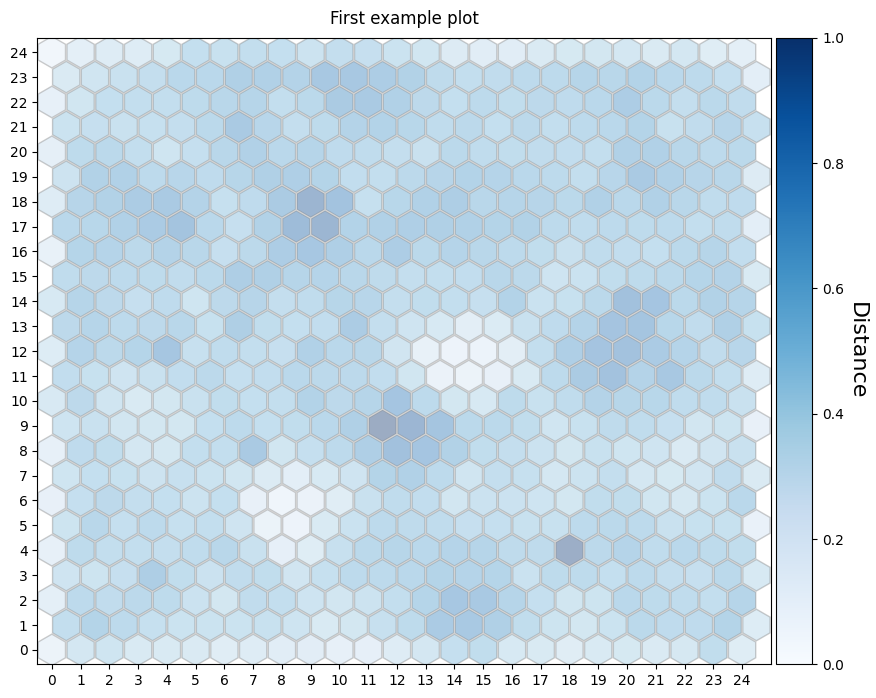

In [28]:
fig = laytr.make_hex_plot(som)
# And give it a title
fig.axes[0].set_title("First example plot", pad=10)

By default, the hue of the map will be the `som.distance_map()`. 

We can control the hue by building our own `hue_matrix`. 
We'll use a result from `laytr map` and build the `hue_matrix` as the count of how many regions hit each neuron.

In [29]:
m_map = joblib.load("../repo_utils/map.jl")
# Must be the same shape as the SOM's dimensions
hue_matrix = np.zeros(som.get_weights().shape[:2], dtype=int)
for i in m_map:
    hue_matrix[i[0], i[1]] += 1

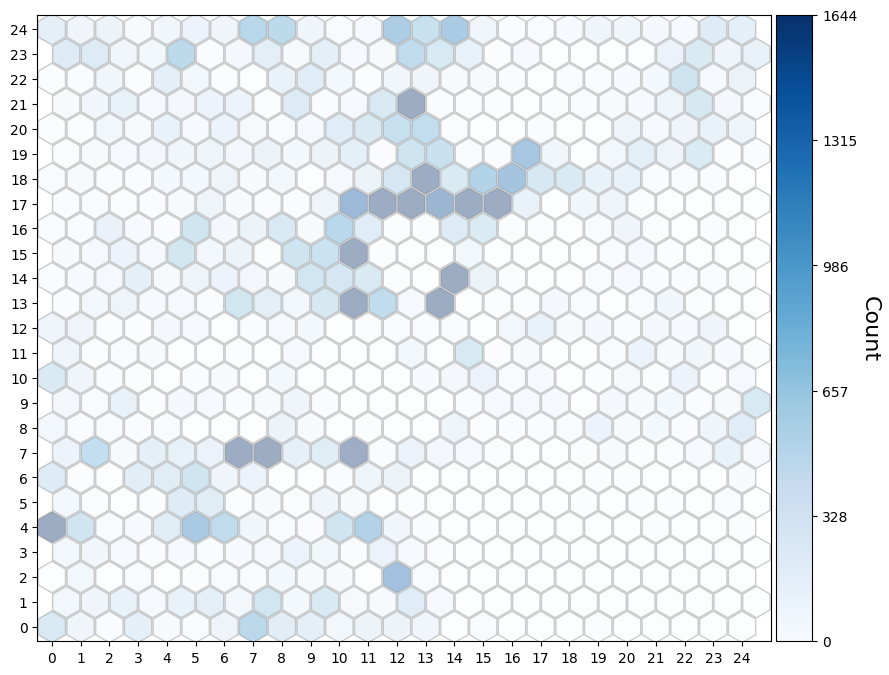

In [30]:
fig2 = laytr.make_hex_plot(som, hue=hue_matrix, hue_label="Count", hue_count_ticks=True)

Additionally, we can place markers on our plot for different region labels.

We'll randomly pick a few neurons to put markers on.

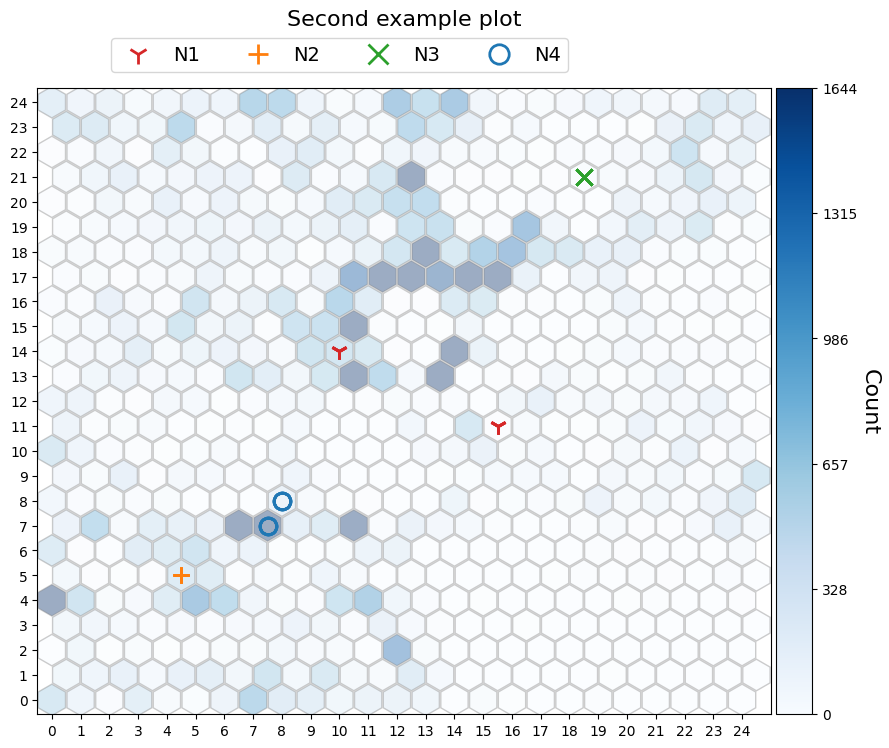

In [38]:
neurons = np.array([[10, 14], [15,11], [4, 5], [18, 21], [7,7], [8, 8]])
labels = ['N1', 'N1', 'N2', 'N3', 'N4', 'N4']
markers = {'N1':'1', 'N2':'+', 'N3':'x', 'N4':'o'}
fig = laytr.add_places(som, fig2, neurons, labels, markers)
# Add a title. Note we need more padding to get around the markers' label
fig.axes[0].set_title("Second example plot", pad=45, size=16)
fig